<a href="https://colab.research.google.com/github/ADinng/CS6319_MachineLearning/blob/main/CS6419_L11and12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L11

### Expectation maximisation

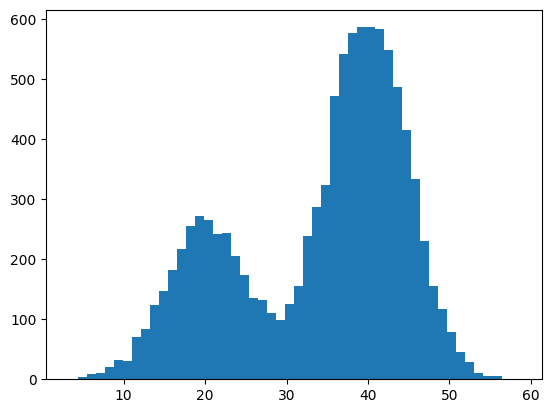

In [2]:
from numpy import hstack
from numpy.random import normal
from matplotlib import pyplot

X1 = normal(loc=20, scale=5, size = 3000)
X2 = normal(loc=40, scale=5, size = 7000)

X = hstack((X1, X2))
X = X.reshape((len(X),1))

pyplot.hist(X, bins=50)
pyplot.show()

In [14]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2)
gm.fit(X)

y = gm.predict(X)
print(y[:100])
print(y[-100:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
Xnew, ynew = gm.sample(6)
Xnew

array([[36.13795702],
       [45.60500458],
       [40.63139093],
       [45.98235501],
       [36.81076487],
       [20.45631304]])

In [16]:
ynew

array([0, 0, 0, 0, 0, 1])

### DBSCAN

In [17]:
from sklearn.cluster import DBSCAN
import numpy as np

X = np.array([[1,2],[2,2],[2,3],[8,7],[8,8],[25,80]])
db = DBSCAN(eps=3, min_samples=2)
clustering = db.fit(X)
print(clustering.labels_)

[ 0  0  0  1  1 -1]


# L12

### Unsupervised learning: association rule mining

In [18]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=297d0656f206e0ebfa28baf2cbe216018047e81aea6eb2477088f7c48d6f6323
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [20]:
import numpy as np
import pandas as pd
from apyori import apriori

In [21]:
basket = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/78a9bd799b5fbf35344beff50304169f789d264c/Market_Basket_Optimisation.csv?raw=true", header=None)

In [22]:
basket

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
records = []
for i in range(0, 7501):
  records.append([str(basket.values[i,j]) for j in range(0,20)])

In [24]:
rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
results = list(rules)

In [25]:
len(results)

48

In [26]:
results[0]

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

In [28]:
for item in results:
  pair = item[0]
  items = [x for x in pair]
  print("Rule: "+items[0]+ " -> " + items[1])
  print("Support: " + str(item[1]))
  print("Confidence: "+ str(item[2][0][2]))
  print("Lift: "+ str(item[2][0][3]))
  print("======================================")

Rule: chicken -> light cream
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: mushroom cream sauce -> escalope
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: ground beef -> herb & pepper
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: ground beef -> tomato sauce
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: whole wheat pasta -> olive oil
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: nan -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: shrimp -> frozen vegetables
Support: 0.005332622317024397
Confidence: 0.